In [52]:
import pickle

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, median_absolute_error
from sklearn.model_selection import train_test_split

import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm

%matplotlib inline

In [53]:
with open('end-part1_df.pkl', 'rb') as fp:
    df = pickle.load(fp)

In [54]:
# df = pd.read_csv('end-part2_df.csv').set_index('date')

In [55]:
df.head()

,temperatureMean,temperatureMax,temperatureMin,temperatureMean_1,temperatureMean_2,temperatureMean_3,dewPoint_1,dewPoint_2,dewPoint_3,humidity_1,...,humidity_3,temperatureMax_1,temperatureMax_2,temperatureMax_3,temperatureMin_1,temperatureMin_2,temperatureMin_3,precipProbability_1,precipProbability_2,precipProbability_3
date,,,,,,,,,,,,,,,,,,,,,
2020-04-10 13:01:50.648890,84.932500,95.97,71.36,83.597917,85.734583,87.022083,62.82,61.66,61.48,0.51,...,0.44,94.96,97.72,99.10,73.34,74.25,76.46,0.08,0.19,0.13
2020-04-11 13:01:50.648890,87.160833,97.90,72.96,84.932500,83.597917,85.734583,57.25,62.82,61.66,0.44,...,0.48,95.97,94.96,97.72,71.36,73.34,74.25,0.04,0.08,0.19
2020-04-12 13:01:50.648890,87.787917,99.46,74.58,87.160833,84.932500,83.597917,52.57,57.25,62.82,0.34,...,0.51,97.90,95.97,94.96,72.96,71.36,73.34,0.05,0.04,0.08
2020-04-13 13:01:50.648890,87.380833,99.12,73.70,87.787917,87.160833,84.932500,52.88,52.57,57.25,0.32,...,0.44,99.46,97.90,95.97,74.58,72.96,71.36,0.10,0.05,0.04
2020-04-14 13:01:50.648890,88.815000,99.32,76.45,87.380833,87.787917,87.160833,52.72,52.88,52.57,0.32,...,0.34,99.12,99.46,97.90,73.70,74.58,72.96,0.07,0.10,0.05


In [56]:
df_corr = df.corr()[['temperatureMean']].sort_values('temperatureMean')

In [57]:
df_corr_fil = df_corr[abs(df_corr['temperatureMean']) > 0.55]

In [58]:
unwanted = ['temperatureMin', 'temperatureMax', 'temperatureMean']
predictors = df_corr_fil.index.tolist()
predictors = [i for i in predictors if i not in unwanted]

In [59]:
#print(df)
df2 = df[['temperatureMean'] + predictors]
#print(df2)

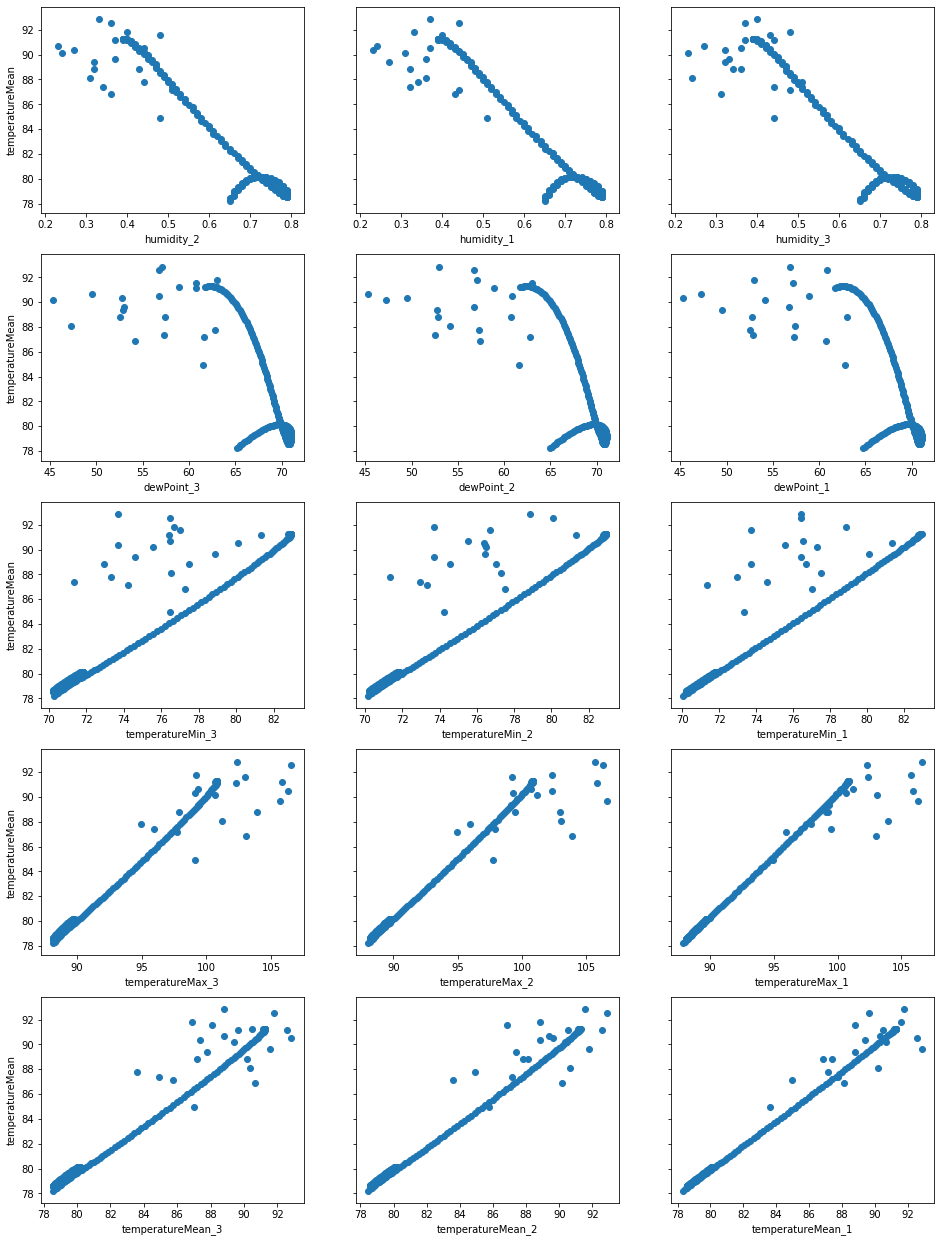

In [60]:
# manually set the parameters of the figure to an appropriate size
plt.rcParams['figure.figsize'] = [16, 22]

# call subplots specifying the grid structure we desire and that
# the y axes should be shared
fig, axes = plt.subplots(nrows=5, ncols=3, sharey=True)

# Since it would be nice to loop through the features in to build this plot
# let us rearrange our data into a 2D array of 6 rows and 3 columns
arr = np.array(predictors).reshape(5, 3)

# use enumerate to loop over the arr 2D array of rows and columns
# and create scatter plots of each meantempm vs each feature
for row, col_arr in enumerate(arr):
    for col, feature in enumerate(col_arr):
        axes[row, col].scatter(df2[feature], df2['temperatureMean'])
        if col ==0:
            axes[row, col].set(xlabel=feature, ylabel='temperatureMean')
        else:
            axes[row, col].set(xlabel=feature)
plt.show()

In [61]:
# separate the predictor variables (X) from the outcome variable y
X = df2[predictors]
y = df2['temperatureMean']

# Add a constant to the predictor variable set to represent the Bo intercept
# X = sm.add_constant(X)
X.iloc[:5, :5]

,humidity_2,humidity_1,humidity_3,dewPoint_3,dewPoint_2
date,,,,,
2020-04-10 13:01:50.648890,0.48,0.51,0.44,61.48,61.66
2020-04-11 13:01:50.648890,0.51,0.44,0.48,61.66,62.82
2020-04-12 13:01:50.648890,0.44,0.34,0.51,62.82,57.25
2020-04-13 13:01:50.648890,0.34,0.32,0.44,57.25,52.57
2020-04-14 13:01:50.648890,0.32,0.32,0.34,52.57,52.88


In [62]:
alpha = 0.01

def stepwise_selection(X, y, 
                       initial_list=predictors,  
                       threshold_out=alpha, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

result = stepwise_selection(X, y)

print('resulting features:')
print(result)

Drop temperatureMin_3               with p-value 0.753139
Drop humidity_2                     with p-value 0.329104
Drop humidity_1                     with p-value 0.628433
Drop temperatureMax_3               with p-value 0.227703
resulting features:
['humidity_3', 'dewPoint_3', 'dewPoint_2', 'dewPoint_1', 'temperatureMin_2', 'temperatureMin_1', 'temperatureMax_2', 'temperatureMax_1', 'temperatureMean_3', 'temperatureMean_2', 'temperatureMean_1']


c:\python38\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [63]:
X = X[result]
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        temperatureMean   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.737e+06
Date:                Fri, 17 Apr 2020   Prob (F-statistic):                        0.00
Time:                        20:10:49   Log-Likelihood:                         -14.391
No. Observations:                 197   AIC:                                      50.78
Df Residuals:                     186   BIC:                                      86.90
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
humidity_3            3.4472      1.155      2.984      0.003       1.168       5.726
dewPoint_3            0.1738      0.030      5.756      0.000       0.114       0.233
dewPoint_2           -0.1572      0.045     -3.472      0.001      -0.247      -0.068
dewPoint_1           -0.1145      0.032     -3.628      0.000      -0.177      -0.052
temperatureMin_2      0.5796      0.047     12.245      0.000       0.486       0.673
temperatureMin_1     -0.5259      0.044    -12.038      0.000      -0.612      -0.440
temperatureMax_2      0.4968      0.062      7.967      0.000       0.374       0.620
temperatureMax_1     -0.3474      0.073     -4.791      0.000      -0.490      -0.204
temperatureMean_3     0.2874      0.065      4.396      0.000       0.158       0.416
temperatureMean_2    -0.8304      0.129     -6.443      0.000      -1.085      -0.576
temperatureMean_1     1.3804      0.135     10.207      0.000       1.114       1.647
==============================================================================
Omnibus:                       69.981   Durbin-Watson:                   1.709
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1808.304
Skew:                          -0.641   Prob(JB):                         0.00
Kurtosis:                      17.787   Cond. No.                     1.52e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.52e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [64]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=12)

In [65]:
# instantiate the regressor class
regressor = LinearRegression()

# fit the model by fitting the regressor to the training data
regressor.fit(X_train, y_train)

# make a prediction set using the test set
prediction = regressor.predict(X_test)

# Evaluate the prediction accuracy of the model 
print('The Explained Variance: %.2f' % regressor.score(X_test, y_test))
print('The Mean Absolute Error: %.2f degrees celcius' % mean_absolute_error(
    y_test, prediction))
print('The Median Absolute Error: %.2f degrees celcius' %
      median_absolute_error(y_test, prediction))

The Explained Variance: 0.98
The Mean Absolute Error: 0.27 degrees celcius
The Median Absolute Error: 0.06 degrees celcius
